In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing



In [2]:
df_de_state =pd.read_excel('data_for_modeling.xlsx',sheet_name='sheet1', engine='openpyxl')
df_de_it =pd.read_excel('data_for_modeling.xlsx',sheet_name='sheet2', engine='openpyxl')
df_de =pd.read_excel('data.xlsx',sheet_name='sheet1',index_col=0, engine='openpyxl')

In [3]:
df_de_state.head()

,State,Year,Emission in metric tons
0,AK,2020,227011.06
1,AL,2020,428724.98
2,AR,2020,332116.35
3,AZ,2020,487898.79
4,CA,2020,240849.09


In [4]:
df_de_it.head()

,IT_sectors,Year,Emission in metric tons
0,Chemicals,2020,318311.27
1,"Chemicals,Coal-based Liquid Fuel Supply,Suppli...",2020,3230507.30
2,"Chemicals,Industrial Gas Suppliers",2020,281269.82
3,"Chemicals,Industrial Gas Suppliers,Minerals",2020,49540.27
4,"Chemicals,Industrial Gas Suppliers,Waste",2020,32761.46


In [5]:
df_de.describe()

,FRS_Id,Zip Code,Latitude,Longitude,Primary_NAICS_Code,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
count,6.405000e+03,6515.000000,6515.000000,6515.000000,6515.000000,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03
mean,1.100244e+11,53978.809977,37.315360,-92.479267,364410.079202,3.684321e+05,4.064988e+05,4.352801e+05,4.314888e+05,4.474238e+05,4.672780e+05,4.916863e+05,5.002783e+05,5.076397e+05,5.340269e+05
std,2.408523e+07,27107.727878,5.978644,16.760792,143584.980862,1.064542e+06,1.180335e+06,1.277499e+06,1.275032e+06,1.279495e+06,1.316998e+06,1.429759e+06,1.435176e+06,1.397826e+06,1.496368e+06
min,1.100003e+11,0.000000,13.394900,-174.113611,111419.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.196250e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100015e+11,32213.000000,32.904403,-97.801833,221112.000000,3.126729e+04,3.493267e+04,3.614736e+04,3.647170e+04,3.726029e+04,3.940339e+04,4.050051e+04,4.278497e+04,4.553063e+04,4.799812e+04
50%,1.100144e+11,55024.000000,37.785556,-90.212800,325199.000000,6.320322e+04,7.040830e+04,7.578675e+04,7.687800e+04,8.123944e+04,8.508808e+04,8.793460e+04,9.453331e+04,1.052225e+05,1.128387e+05
75%,1.100438e+11,77488.000000,41.242651,-82.604299,486210.000000,1.794937e+05,2.156112e+05,2.668058e+05,2.984203e+05,3.633972e+05,4.422575e+05,4.916863e+05,5.002783e+05,5.076397e+05,5.340269e+05
max,1.100711e+11,99801.000000,71.292071,144.891130,928110.000000,1.723290e+07,1.916974e+07,1.842964e+07,2.079817e+07,1.973314e+07,1.924705e+07,2.048246e+07,2.229333e+07,2.181556e+07,2.207365e+07


In [6]:
df_de.columns

Index(['FRS_Id', 'Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       'IT_sectors', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011'],
      dtype='object')

In [7]:
df_de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6515 entries, 1004377 to 1011696
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FRS_Id              6405 non-null   float64
 1   Facility_Name       6515 non-null   object 
 2   City                6515 non-null   object 
 3   State               6515 non-null   object 
 4   Zip Code            6515 non-null   int64  
 5   Address             6038 non-null   object 
 6   County              6261 non-null   object 
 7   Latitude            6515 non-null   float64
 8   Longitude           6515 non-null   float64
 9   Primary_NAICS_Code  6515 non-null   int64  
 10  IT_subparts         6515 non-null   object 
 11  IT_sectors          6515 non-null   object 
 12  2020                6515 non-null   float64
 13  2019                6515 non-null   float64
 14  2018                6515 non-null   float64
 15  2017                6515 non-null   float64
 1

# Dropping the column with null values

In [8]:
df_de.drop(['FRS_Id'], axis=1, inplace=True)

In [9]:
#correlation between the chosen features
df_de.corr()

,Zip Code,Latitude,Longitude,Primary_NAICS_Code,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
Zip Code,1.000000,-0.063065,-0.693603,-0.028343,0.017572,0.016953,0.012113,0.008991,0.002575,0.006953,0.006618,0.010419,0.007045,0.001032
Latitude,-0.063065,1.000000,-0.148892,0.040426,-0.039519,-0.033699,-0.031186,-0.029003,-0.033302,-0.031521,-0.030702,-0.028785,-0.034494,-0.035901
Longitude,-0.693603,-0.148892,1.000000,0.040631,0.009452,0.009275,0.013322,0.014740,0.018683,0.015669,0.019521,0.015349,0.018387,0.022843
Primary_NAICS_Code,-0.028343,0.040426,0.040631,1.000000,-0.226516,-0.225320,-0.222622,-0.216491,-0.224069,-0.226700,-0.220020,-0.218490,-0.221687,-0.214428
2020,0.017572,-0.039519,0.009452,-0.226516,1.000000,0.973522,0.953903,0.941323,0.924452,0.909017,0.878707,0.877565,0.861165,0.845639
2019,0.016953,-0.033699,0.009275,-0.225320,0.973522,1.000000,0.980539,0.967608,0.954231,0.941964,0.921308,0.917964,0.902315,0.887277
2018,0.012113,-0.031186,0.013322,-0.222622,0.953903,0.980539,1.000000,0.984697,0.973432,0.958177,0.946340,0.942540,0.928244,0.918990
2017,0.008991,-0.029003,0.014740,-0.216491,0.941323,0.967608,0.984697,1.000000,0.983437,0.966489,0.955018,0.950880,0.934545,0.928184
2016,0.002575,-0.033302,0.018683,-0.224069,0.924452,0.954231,0.973432,0.983437,1.000000,0.982693,0.970035,0.962705,0.953791,0.942199
2015,0.006953,-0.031521,0.015669,-0.226700,0.909017,0.941964,0.958177,0.966489,0.982693,1.000000,0.982281,0.977157,0.967508,0.955439


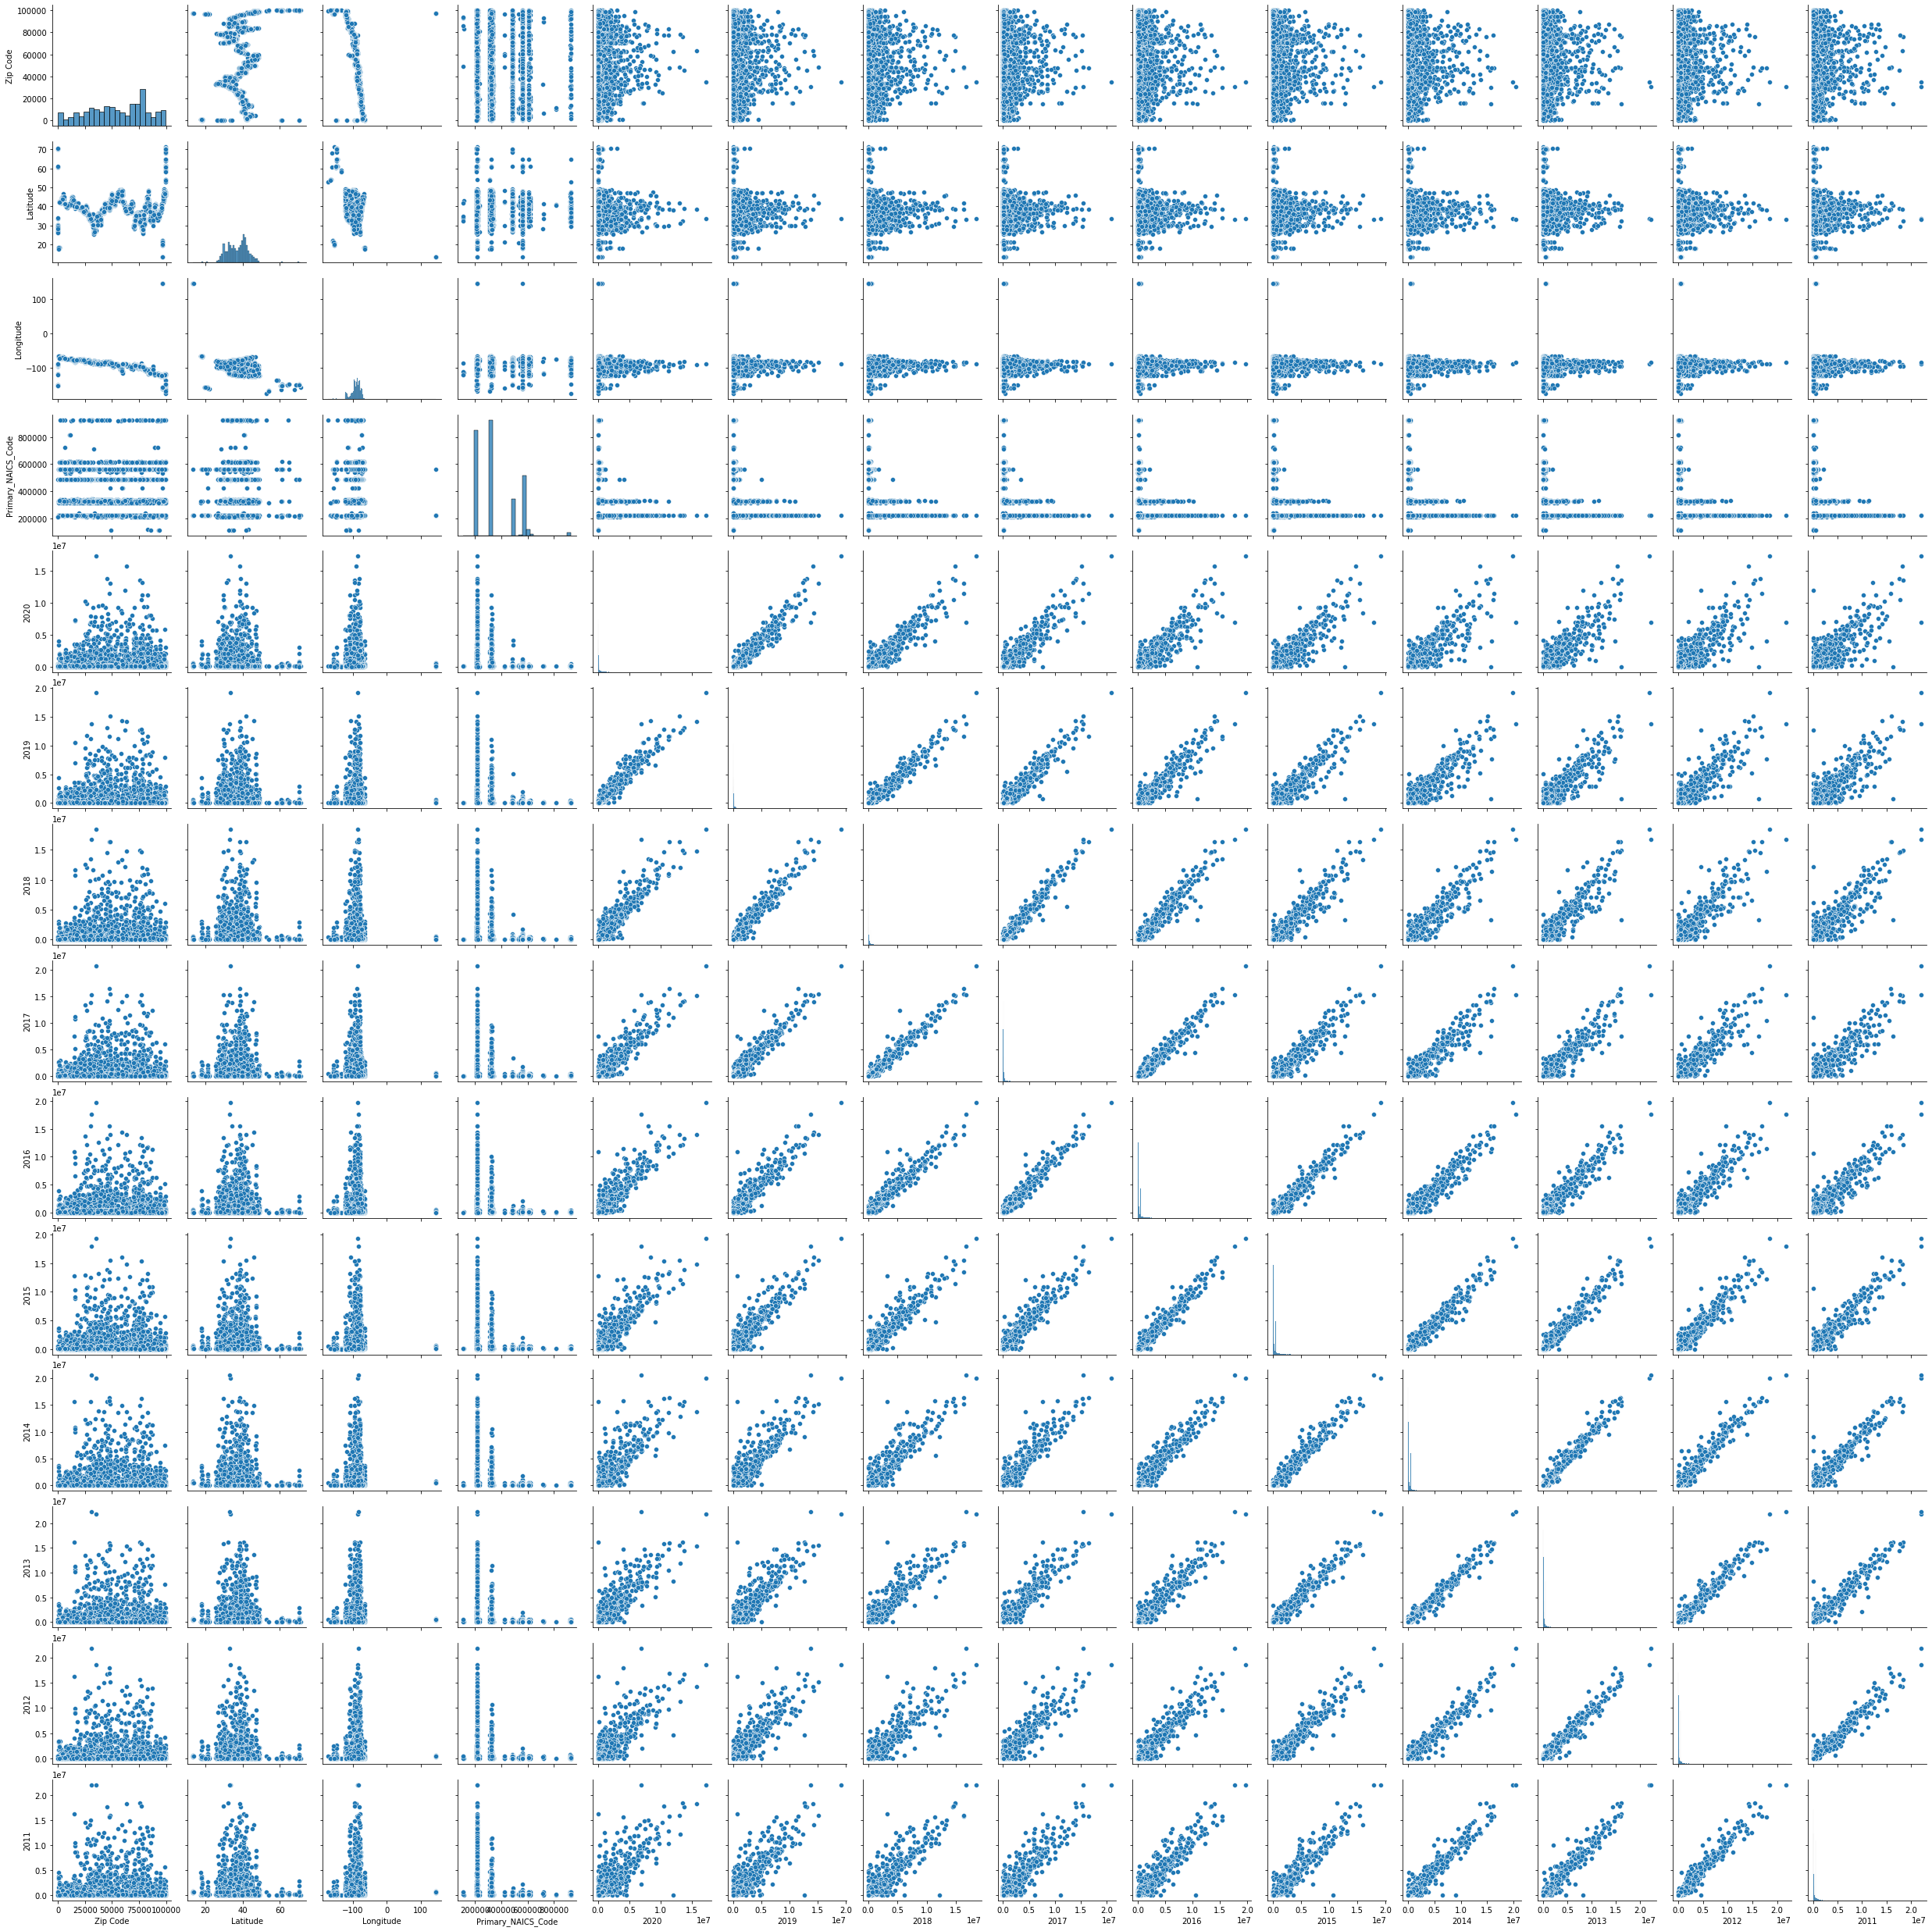

In [10]:
sns.pairplot(df_de)

<AxesSubplot:>

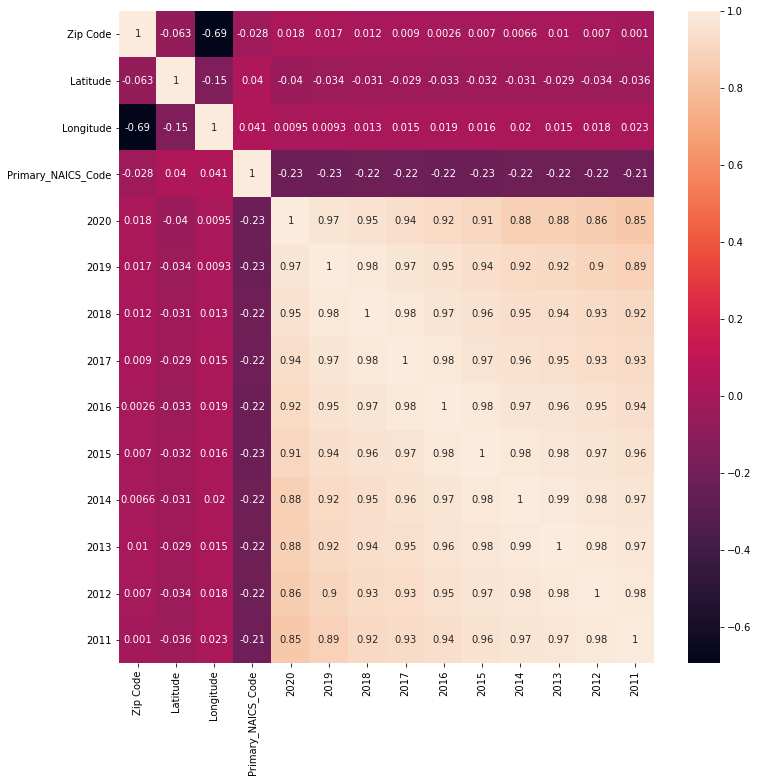

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df_de.corr(),annot=True)

#### <font color= brown>*Both the charts clearly show that correllation between the emissions in different years is high.* We already noticed this in numbers while using the corr method. The correlation between the emission data for the year 2019 and 2020 is precisely 0.97.</font> 

<AxesSubplot:xlabel='2019', ylabel='2020'>

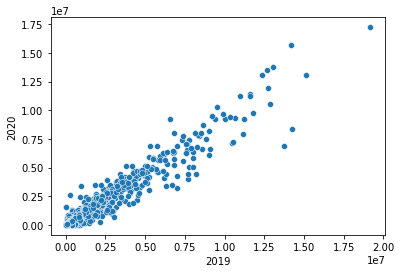

In [13]:
sns.scatterplot(x=df_de['2019'],y=df_de['2020'])

<AxesSubplot:xlabel='2019', ylabel='2020'>

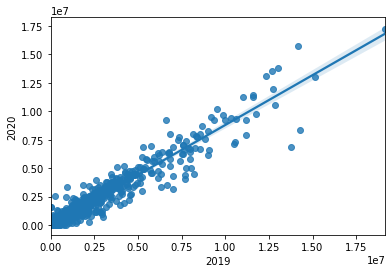

In [14]:
sns.regplot(x=df_de['2019'],y=df_de['2020'],data='df_de')

# Linear regression model using OLS

In [16]:
X=df_de[['Latitude','Longitude', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011']]
X=sm.add_constant(X)
y = df_de[['2020']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123)

In [20]:
rModel1 = sm.OLS(y_train, X_train)
rModel1_results = rModel1.fit()
rModel1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2020   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     9391.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:28:44   Log-Likelihood:                -67155.
No. Observations:                4886   AIC:                         1.343e+05
Df Residuals:                    4874   BIC:                         1.344e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.987e+04    2.5e+04      2.397      0.017    1.09e+04    1.09e+05
Latitude    -908.8372    544.800     -1.668      0.095   -1976.890     159.216
Longitude    143.2024    190.653      0.751      0.453    -230.564     516.969
2019           0.8471      0.014     59.287      0.000       0.819       0.875
2018          -0.0056      0.019     -0.297      0.767      -0.042       0.031
2017           0.1724      0.019      9.158      0.000       0.135       0.209
2016          -0.0483      0.020     -2.372      0.018      -0.088      -0.008
2015           0.2009      0.018     11.101      0.000       0.165       0.236
2014          -0.2037      0.018    -11.534      0.000      -0.238      -0.169
2013          -0.0152      0.017     -0.898      0.369      -0.049       0.018
2012          -0.0469      0.015     -3.044      0.002      -0.077      -0.017
2011           0.0049      0.012      0.401      0.688      -0.019       0.029
==============================================================================
Omnibus:                     2140.849   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1466850.700
Skew:                          -0.631   Prob(JB):                         0.00
Kurtosis:                      87.874   Cond. No.                     3.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

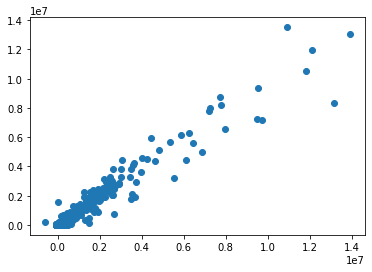

In [21]:
y_pred = rModel1_results.predict(X_test)
plt.scatter(y_pred, y_test)


In [23]:
import math

print('Mean squared error of OLS model, lesser features', mean_squared_error(y_test, y_pred))
print('SQRT of R-squared', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean absolute error of OLS model, lesser features', mean_absolute_error(y_test, y_pred))
print('R-sqruared', rModel1_results.rsquared)

Mean squared error of OLS model, lesser features 67299104876.27368
SQRT of R-squared 259420.71019152206
Mean absolute error of OLS model, lesser features 80557.715047278
R-sqruared 0.954945478229788


# One-hot encoded for States

In [24]:
X = df_de.drop(['2020','Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County','Primary_NAICS_Code', 'IT_subparts', 'IT_sectors','Primary_NAICS_Code'],axis = 1)
st_dummies=pd.get_dummies(df_de['State'])
X_st = X.join(st_dummies)

In [25]:
y_st=df_de[['2020']]
y_st.shape

(6515, 1)

In [36]:
X_st_train, X_st_test, y_st_train, y_st_test=train_test_split(X_st, y_st, test_size = 0.25, random_state = 246)
X_st_train.columns

Index(['Latitude', 'Longitude', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC',
       'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

In [37]:
rModel_oh_st = sm.OLS(y_st_train, X_st_train)


In [38]:
rModel_oh_st_results = rModel_oh_st.fit()
rModel_oh_st_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2020   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1645.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:54:10   Log-Likelihood:                -67023.
No. Observations:                4886   AIC:                         1.342e+05
Df Residuals:                    4821   BIC:                         1.346e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Latitude    2076.7615   2370.082      0.876      0.381   -2569.681    6723.204
Longitude   5178.3376   1716.334      3.017      0.003    1813.539    8543.136
2019           0.8054      0.015     54.252      0.000       0.776       0.835
2018           0.1487      0.019      7.659      0.000       0.111       0.187
2017          -0.0096      0.020     -0.488      0.626      -0.048       0.029
2016           0.0567      0.020      2.864      0.004       0.018       0.095
2015           0.0770      0.019      4.037      0.000       0.040       0.114
2014          -0.2485      0.019    -13.235      0.000      -0.285      -0.212
2013           0.0544      0.018      2.999      0.003       0.019       0.090
2012           0.0169      0.016      1.043      0.297      -0.015       0.049
2011           0.0024      0.012      0.204      0.838      -0.021       0.026
AK            6.6e+05   2.69e+05      2.449      0.014    1.32e+05    1.19e+06
AL          3.889e+05   1.53e+05      2.534      0.011    8.81e+04     6.9e+05
AR          3.551e+05   1.63e+05      2.174      0.030    3.48e+04    6.75e+05
AZ          5.848e+05   1.92e+05      3.041      0.002    2.08e+05    9.62e+05
CA          5.611e+05   2.04e+05      2.745      0.006     1.6e+05    9.62e+05
CO          4.804e+05   1.86e+05      2.588      0.010    1.16e+05    8.44e+05
CT           3.46e+05   1.46e+05      2.378      0.017    6.08e+04    6.31e+05
DC          3.231e+05   1.92e+05      1.686      0.092   -5.26e+04    6.99e+05
DE          3.155e+05   1.53e+05      2.056      0.040    1.46e+04    6.16e+05
FL          4.368e+05   1.43e+05      3.049      0.002    1.56e+05    7.18e+05
GA          3.482e+05   1.48e+05      2.347      0.019    5.73e+04    6.39e+05
GU         -7.078e+05   2.87e+05     -2.462      0.014   -1.27e+06   -1.44e+05
HI          7.668e+05   2.68e+05      2.861      0.004    2.41e+05    1.29e+06
IA          3.932e+05    1.7e+05      2.319      0.020    6.07e+04    7.26e+05
ID          5.154e+05   2.06e+05      2.505      0.012    1.12e+05    9.19e+05
IL           3.87e+05   1.62e+05      2.393      0.017    6.99e+04    7.04e+05
IN          3.358e+05   1.58e+05      2.123      0.034    2.56e+04    6.46e+05
KS          4.421e+05   1.73e+05      2.553      0.011    1.03e+05    7.81e+05
KY          3.576e+05   1.56e+05      2.299      0.022    5.26e+04    6.63e+05
LA          4.112e+05   1.58e+05      2.607      0.009    1.02e+05     7.2e+05
MA          2.849e+05   1.43e+05      1.995      0.046    4921.260    5.65e+05
MD          3.045e+05   1.47e+05      2.074      0.038    1.67e+04    5.92e+05
ME          2.648e+05   1.48e+05      1.793      0.073   -2.47e+04    5.54e+05
MI          3.173e+05   1.59e+05      1.997      0.046    5746.086    6.29e+05
MN          3.847e+05   1.74e+05      2.212      0.027    4.38e+04    7.26e+05
MO

In [39]:
y_st_pred = rModel_oh_st_results.predict(X_st_test)

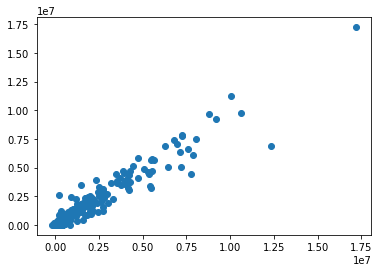

In [40]:
plt.scatter(x=y_st_pred,y= y_st_test)


In [42]:
print('Mean squared error of OLS model, States one-hot encoded', mean_squared_error(y_st_test, y_st_pred))
print('SQRT of R-squared', math.sqrt(mean_squared_error(y_st_test, y_st_pred)))
print('Mean absolute error of OLS model, States one-hot encoded', mean_absolute_error(y_st_test, y_st_pred))
print('R-sqruared', rModel_oh_st_results.rsquared)

Mean squared error of OLS model, States one-hot encoded 76028282997.65079
SQRT of R-squared 275732.2668779459
Mean absolute error of OLS model, States one-hot encoded 93412.37684315704
R-sqruared 0.956213618897869


# one-hot encoded on IT_sectors 

In [33]:
it_encoded = pd.get_dummies(df_de['IT_sectors'])
X_it = X.join(it_encoded)

print(X_it.shape,it_encoded.shape)

(6515, 73) (6515, 62)


In [43]:
X_it = sm.add_constant(X_it)

y_it= df_de[['2020']]
X_it_train, X_it_test, y_it_train, y_it_test=train_test_split(X_it, y_it, test_size = 0.25, random_state = 246)

rModel2_oh_it = sm.OLS(y_it_train, X_it_train)
rModel2_oh_it_results = rModel2_oh_it.fit()
rModel2_oh_it_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2020   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1647.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:56:49   Log-Likelihood:                -66983.
No. Observations:                4886   AIC:                         1.341e+05
Df Residuals:                    4820   BIC:                         1.345e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================================================================
                                                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                              1.177e+05   3.27e+04      3.598      0.000    5.36e+04    1.82e+05
Latitude                                                                                                          -1302.8705    552.727     -2.357      0.018   -2386.468    -219.273
Longitude                                                                                                           -32.8584    203.827     -0.161      0.872    -432.452     366.736
2019                                                                                                                  0.7886      0.015     52.731      0.000       0.759       0.818
2018                                                                                                                  0.1404      0.019      7.238      0.000       0.102       0.178
2017                                                                                                                  0.0193      0.020      0.970      0.332      -0.020       0.058
2016                                                                                                                  0.0546      0.020      2.753      0.006       0.016       0.094
2015                                                                                                                  0.0811      0.019      4.215      0.000       0.043       0.119
2014                                                                                                                 -0.2549      0.019    -13.383      0.000      -0.292      -0.218
2013                                                                                                                  0.0570      0.018      3.129      0.002       0.021       0.093
2012                                                                                                                  0.0079      0.016      0.487      0.626      -0.024       0.040
2011                                                                                                                  0.0018      0.012      0.149      0.881      -0.022       0.025
Chemicals                                                                                                         -5.186e+04    2.4e+04     -2.157      0.031    -9.9e+04   -4724.564
Chemicals,Coal-based Liquid Fuel Supply,Suppliers of CO2                                                          -1.858e+05   2.19e+05     -0.850      0.395   -6.14e+05  

Text(0.5, 1.0, 'Regression after one-hot encoding on IT Sectors')

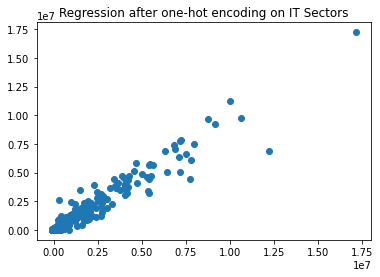

In [44]:
y_it_pred = rModel2_oh_it_results.predict(X_it_test)
plt.scatter(x=y_it_pred,y= y_it_test)
plt.title("Regression after one-hot encoding on IT Sectors")

In [46]:
print('Mean squared error of OLS model, IT sectors one-hot encoded', mean_squared_error(y_it_test, y_it_pred))
print('SQRT of R-squared', math.sqrt(mean_squared_error(y_it_test, y_it_pred)))
print('Mean absolute error of OLS model, IT sectors one-hot encoded', mean_absolute_error(y_it_test, y_it_pred))
print('R-sqruared', rModel2_oh_it_results.rsquared)

Mean squared error of OLS model, IT sectors one-hot encoded 74053813696.9341
SQRT of R-squared 272128.3037409635
Mean absolute error of OLS model, IT sectors one-hot encoded 88196.95975458113
R-sqruared 0.9569166055250563


C:\Users\Radhai\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


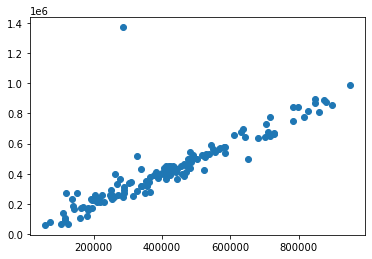

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# separate into input and output columns
X_st= df_de_state.drop('Emission in metric tons', axis =1)
y_st= df_de_state[['Emission in metric tons']]

# split the dataset into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X_st, y_st, test_size = 0.25, random_state = 246)


# one-hot encode input variables
onehot_encoder = OneHotEncoder(drop='first')
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)




rModel_onehot_st = linear_model.LinearRegression(normalize=True)
rModel_onehot_st_results = rModel_onehot_st.fit(X_train,y_train)
# evaluate predictions
ypred = rModel_onehot_st.predict(X_test)
plt.scatter(x=ypred,y = y_test)


In [50]:
print(mean_squared_error(y_test, ypred))
print(math.sqrt(mean_squared_error(y_test, ypred)))
print(mean_absolute_error(y_test, ypred))

10982643197.511654
104798.10684125766
41919.49655679584


### Time Series Analysis -- Arima Model

In [51]:
#import adfuller

from statsmodels.tsa.stattools import adfuller

#method to test the stationarity
def test_stationarity(timeseries):
    rol_mean = timeseries.rolling(5).mean()
    rol_std = timeseries.rolling(5).std()
    orig = plt.plot(timeseries, color = 'blue',label='original')
    mean = plt.plot(rol_mean, color ='red', label = 'Rolling mean')
    std = plt.plot(rol_std, color = 'green', label = 'Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and std')
    plt.show(block = False)
    
    print('Results of Dickey Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] = 20,10
    

#X_train = df_de_state[df_de_state['Year']>=2019]

#X_test = df_de_state[df_de_state['Year']< 2019]
#test_stationarity(X_train['Emission in metric tons'])
    


In [52]:
#columns of the Direct Emission dataset
df_de.columns


Index(['Facility_Name', 'City', 'State', 'Zip Code', 'Address', 'County',
       'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       'IT_sectors', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011'],
      dtype='object')

In [53]:
#resetting the index to build a time series
df_de_ts = df_de.reset_index()

In [54]:
#choosing the state and the emission columns from 2011-2020
df_de_st_ts = df_de_ts[['State','2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011' ]]

df_de_st_ts.head()

,State,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,TX,504064.000,518680.250,653854.000000,250497.500000,221014.750000,199011.750000,241883.500000,289953.250000,204000.000000,194000.000000
1,NY,60819.700,44658.384,70705.288000,52698.656000,66797.352000,67399.252000,40722.200000,102599.220000,68984.744000,100591.828000
2,NM,40521.812,38691.478,435280.099943,431488.809907,447423.757318,467277.995747,491686.293592,500278.254166,507639.706331,534026.861412
3,IL,100500.948,18925.400,31220.150000,29026.800000,120657.600000,92696.600000,120707.350000,97467.500000,87357.750000,95113.250000
4,TX,29359.640,30571.636,34432.420000,36202.264000,31773.480000,36754.712000,36419.864000,34821.820000,33671.924000,37149.360000


In [55]:
#setting 'State' as index column
df_de_st_ts.set_index('State',inplace=True)

In [83]:
#melting the data to bring all the yearly data into a single feature to facilitate time series model
df = pd.melt(df_de_st_ts,ignore_index=False, var_name=['Year'],value_name="Emission in metric tons").reset_index()

In [57]:
df.head()

,State,Year,Emission in metric tons
0,TX,2020,504064.000
1,NY,2020,60819.700
2,NM,2020,40521.812
3,IL,2020,100500.948
4,TX,2020,29359.640


In [58]:
#slicing the data for Illinois state alone
df_IL=df[df['State'] == 'IL']
df_IL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 3 to 65146
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    2330 non-null   object 
 1   Year                     2330 non-null   object 
 2   Emission in metric tons  2330 non-null   float64
dtypes: float64(1), object(2)
memory usage: 72.8+ KB


In [59]:
#converting the Year column to numeric
num_year = pd.to_numeric(df_IL['Year'])
df_IL['Year'] = num_year
num_year

<ipython-input-59-6f80c0976380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IL['Year'] = num_year


3        2020
10       2020
25       2020
38       2020
44       2020
         ... 
65072    2011
65076    2011
65080    2011
65142    2011
65146    2011
Name: Year, Length: 2330, dtype: int64

In [60]:
#checking for Null values
df_IL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 3 to 65146
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    2330 non-null   object 
 1   Year                     2330 non-null   int64  
 2   Emission in metric tons  2330 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 72.8+ KB


In [62]:
#splitting the date to training and testing sets
X_train = df_IL.loc[df_IL['Year'].isin([2011,2012,2013,2014,2015,2016,2017,2018,2019])]

X_test = df_IL.loc[df_IL['Year'] == 2020]


In [63]:
X_train.shape, X_test.shape

((2097, 3), (233, 3))

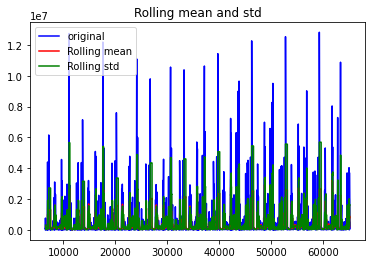

Results of Dickey Fuller Test
Test Statistic                -1.148403e+01
p-value                        4.915254e-21
Lags used                      2.600000e+01
Number of observations used    2.070000e+03
Critical Value (1%)           -3.433513e+00
Critical Value (5%)           -2.862937e+00
Critical Value (10%)          -2.567514e+00
dtype: float64


In [64]:
#testing the stationarity of the training data
test_stationarity(X_train['Emission in metric tons'])

#### <font color=brown> Test Statistic is greater than the critical value, hence the series is not stationary.</font>

In [65]:
X_test

,State,Year,Emission in metric tons
3,IL,2020,100500.9480
10,IL,2020,657865.8974
25,IL,2020,55009.3920
38,IL,2020,86205.0760
44,IL,2020,104084.4080
...,...,...,...
6437,IL,2020,28220.2840
6441,IL,2020,30218.2500
6445,IL,2020,395135.5720
6507,IL,2020,66481.5500


C:\Users\Radhai\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


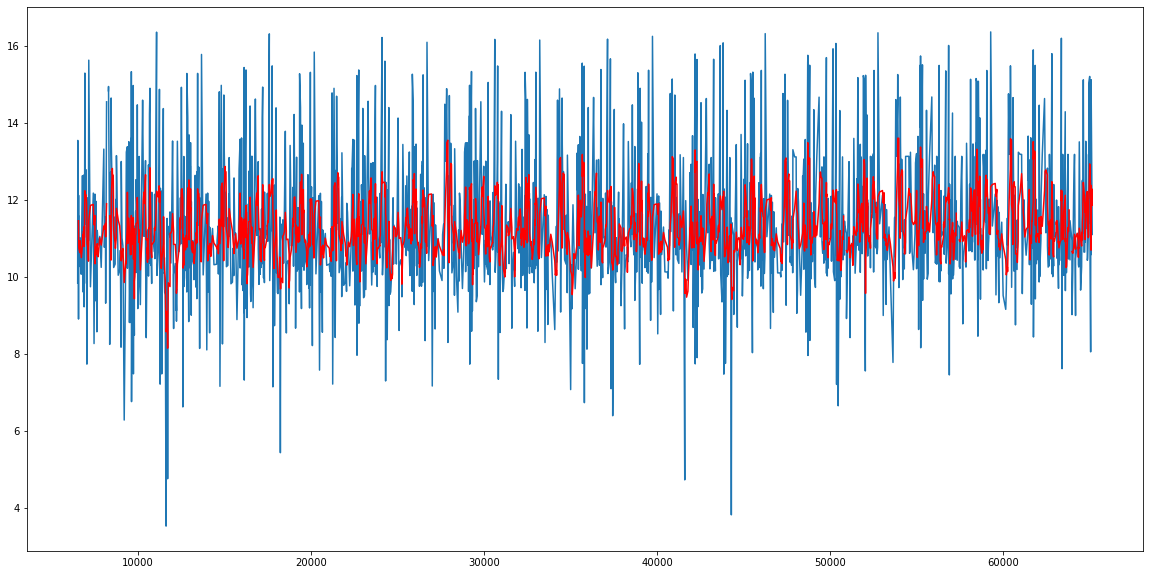

In [66]:
#Removing the trend

import pandas as pd
train_log = np.log(X_train['Emission in metric tons'])
test_log = np.log(X_test['Emission in metric tons'])
moving_avg = train_log.rolling(5).mean()
plt.plot(train_log)
plt.plot(moving_avg, color='red')
plt.show()


In [67]:
train_log_ma_diff = train_log - moving_avg

In [68]:
train_log_ma_diff.dropna(inplace=True)


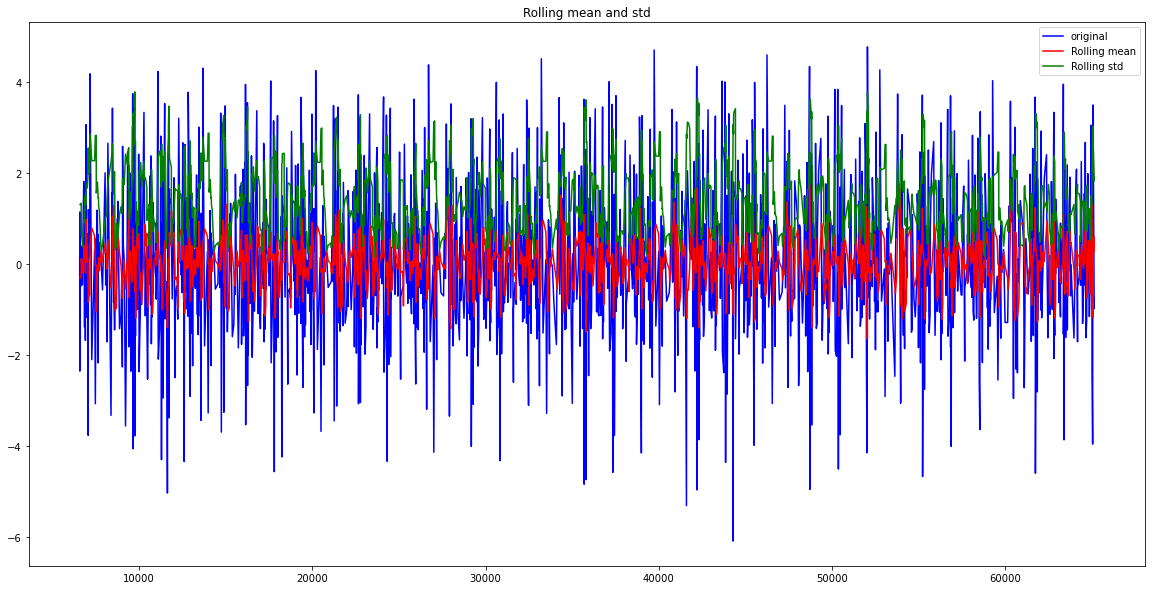

Results of Dickey Fuller Test
Test Statistic                -1.558455e+01
p-value                        1.913871e-28
Lags used                      2.600000e+01
Number of observations used    2.046000e+03
Critical Value (1%)           -3.433550e+00
Critical Value (5%)           -2.862954e+00
Critical Value (10%)          -2.567523e+00
dtype: float64


In [69]:
test_stationarity(train_log_ma_diff)

#### <font color=brown>Still, the test Statistic is greater than the critical values, hence the series is not stationary.</font>

In [70]:
train_log_diff = train_log - train_log.shift(1)
np.any(~np.isfinite(train_log_diff),axis=0)

True

In [71]:
train_log_diff_finite = np.isfinite(train_log_diff) 


In [74]:
train_log_diff[train_log_diff_finite]

6525     3.701945
6540    -2.651060
6553     0.523330
6559     0.181264
6567    -2.689114
           ...   
65072   -2.603400
65076    0.654726
65080    3.886304
65142   -3.831679
65146   -0.184522
Name: Emission in metric tons, Length: 2088, dtype: float64

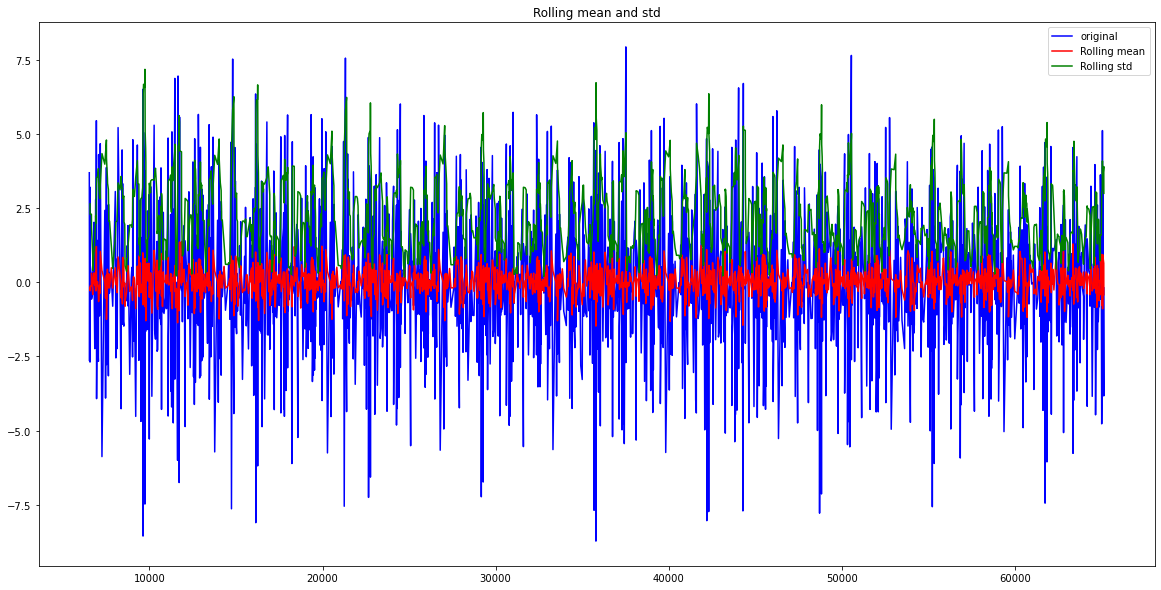

Results of Dickey Fuller Test
Test Statistic                -1.699765e+01
p-value                        8.775674e-30
Lags used                      2.200000e+01
Number of observations used    2.065000e+03
Critical Value (1%)           -3.433521e+00
Critical Value (5%)           -2.862941e+00
Critical Value (10%)          -2.567516e+00
dtype: float64


In [75]:
test_stationarity(train_log_diff[train_log_diff_finite])

In [76]:
train_log[~np.isfinite(train_log)]

8225    -inf
50806   -inf
57321   -inf
63836   -inf
Name: Emission in metric tons, dtype: float64

In [77]:
train_log[np.isfinite(train_log)]

6518      9.848260
6525     13.550205
6540     10.899146
6553     11.422476
6559     11.603740
           ...    
65072    10.584801
65076    11.239527
65080    15.125831
65142    11.294152
65146    11.109630
Name: Emission in metric tons, Length: 2093, dtype: float64

In [78]:
train_log_finite = train_log[np.isfinite(train_log)]

In [79]:
#Removing Stationarity

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(train_log_finite)['Emission in metric tons'].values, period = 2)

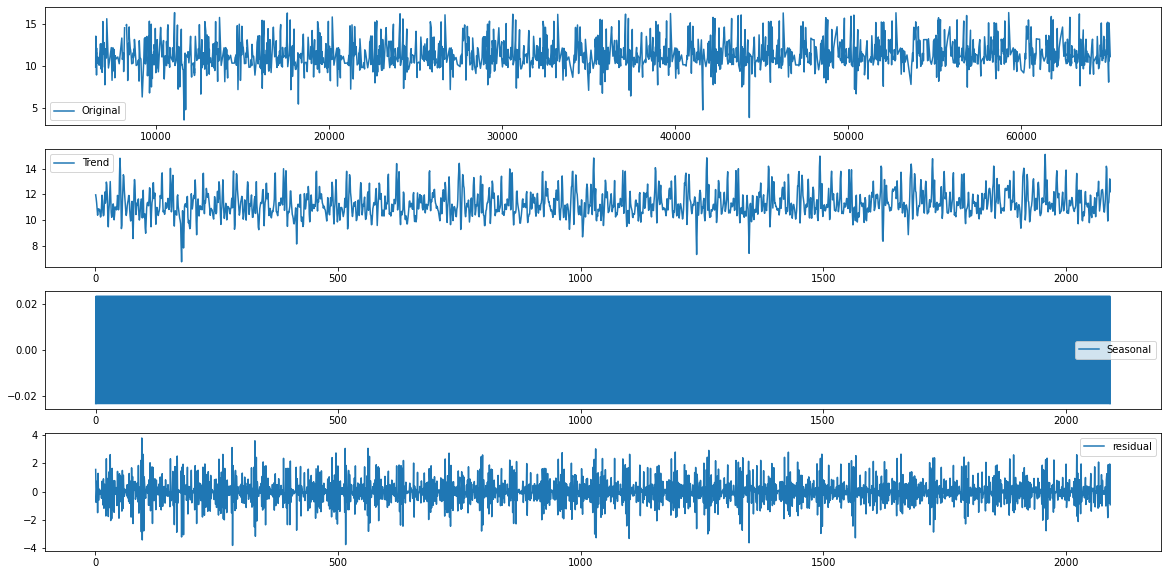

In [80]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(train_log, label= 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label= 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label= 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label= 'residual')
plt.legend(loc = 'best')

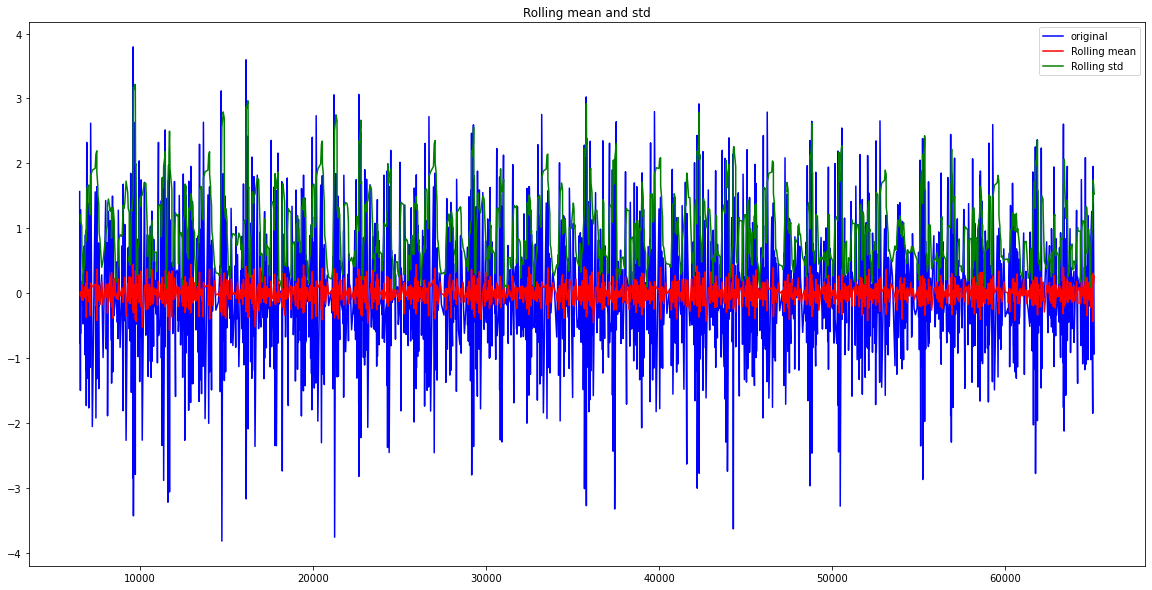

Results of Dickey Fuller Test
Test Statistic                  -20.373369
p-value                           0.000000
Lags used                        25.000000
Number of observations used    2065.000000
Critical Value (1%)              -3.433521
Critical Value (5%)              -2.862941
Critical Value (10%)             -2.567516
dtype: float64


In [81]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['Year'] = train_log_finite.index
train_log_decompose.set_index('Year', inplace=True)
train_log_decompose.dropna(inplace= True)
test_stationarity(train_log_decompose)

In [82]:
#Forecasting the time series

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff,nlags = 2)
lag_pacf = pacf(train_log, nlags=25, method='ols')

C:\Users\Radhai\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\Radhai\anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
plt.plot(lag_acf)
plt.show()

In [4]:
df_de_state.head()

,State,Year,Emission in metric tons
0,AK,2020,227011.06
1,AL,2020,428724.98
2,AR,2020,332116.35
3,AZ,2020,487898.79
4,CA,2020,240849.09


In [ ]:
df_de_ts = df_de.reset_index()

df_de_st_ts = df_de_ts[['State','2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011' ]]

df_de_st_ts.head()
df_de_st_ts.set_index('State',inplace=True)
df = pd.melt(df_de_st_ts,ignore_index=False, var_name=['Year'],value_name="Emission in metric tons").reset_index()
df.head()
df_IL=df[df['State'] == 'IL']
df_IL.info()
num_year = pd.to_numeric(df_IL['Year'])
df_IL['Year'] = num_year
num_year

### Using fbprophet

In [6]:
from fbprophet import Prophet
#df_de_ts = df_de.reset_index()

#df_de_st_ts = df_de_ts[['State','2020', '2019', '2018', '2017', '2016', '2015', '2014','2013', '2012', '2011' ]]

#df_de_st_ts.head()
#df_de_st_ts.set_index('State',inplace=True)
#df = pd.melt(df_de,ignore_index=False, var_name=['Year'],value_name="Emission in metric tons").reset_index()
#df.head()
df_IL=df_de_state[df_de_state['State'] == 'IL']
df_IL.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 15 to 501
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    10 non-null     object 
 1   Year                     10 non-null     int64  
 2   Emission in metric tons  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 320.0+ bytes


In [7]:
y = pd.to_datetime(df_IL['Year'])
df_IL['Year']=y

<ipython-input-7-f5688a422fe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IL['Year']=y


In [8]:
df_IL.columns

Index(['State', 'Year', 'Emission in metric tons'], dtype='object')

In [9]:
df = df_IL[['Year', 'Emission in metric tons']]

In [10]:
df = df.rename(columns={'Year':'ds','Emission in metric tons':'y'})

In [11]:
df.head()

,ds,y
15,1970-01-01 00:00:00.000002020,330355.20
69,1970-01-01 00:00:00.000002019,379220.85
123,1970-01-01 00:00:00.000002018,395723.07
177,1970-01-01 00:00:00.000002017,381174.05
231,1970-01-01 00:00:00.000002016,397515.97


In [ ]:
m= Prophet()
m.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


KeyError: 'metric_file'